In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io as skio
from skimage.transform import rescale

In [2]:
# My own modules
import sys
import dp_numpy

In [75]:
################################
# Unaries
f = np.load("images/barbara_noisy.npy")
g = np.load("images/barbara.npy")
M,N = g.shape
print(M,N)

sigma = 0.05
K = 50
labels=np.linspace(0,1,K)
unaries = (f[:,:,np.newaxis] - labels[np.newaxis,np.newaxis,:])**2/(2*sigma**2)

##################################
# Pairwise
k,l = np.meshgrid(labels, labels)

# Truncated TV
T = 1
lamb = 15.0
pairwise = np.clip(np.abs(k-l), a_min = None, a_max = T) *lamb
w = None
NB = None


128 128


In [76]:
# Sweep BP: Horizontal+Vertical
one_hot,map_labels,marginals = dp_numpy.sbp(unaries, pairwise, w, NB, maxit=10, softmin=True, verbose=1)

Pairwise cost: FULL
iter =  0 , time =  1.59946 , E =  27923.84585
iter =  1 , time =  3.15740 , E =  27356.76635
iter =  2 , time =  4.71018 , E =  27356.25657
iter =  3 , time =  6.26647 , E =  27347.90351
iter =  4 , time =  7.82281 , E =  27349.45366
iter =  5 , time =  9.37795 , E =  27349.06371
iter =  6 , time =  10.93094 , E =  27347.71733
iter =  7 , time =  12.48587 , E =  27347.71733
iter =  8 , time =  14.03962 , E =  27347.71733
iter =  9 , time =  15.59662 , E =  27347.71733


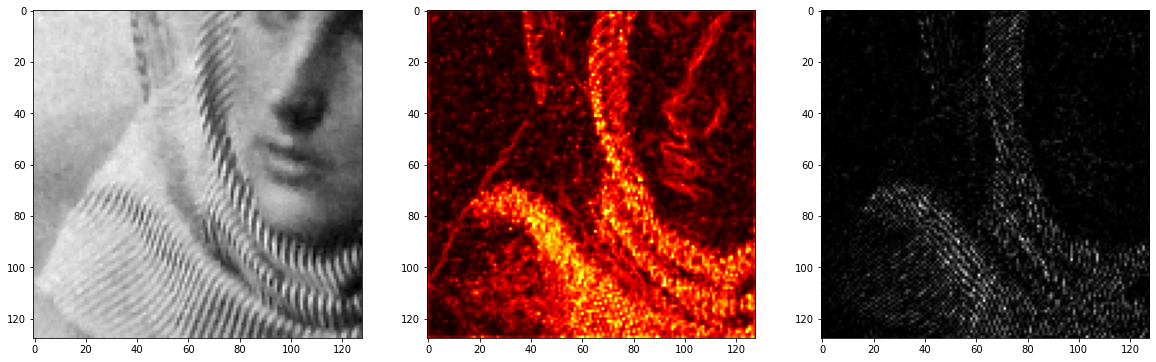

In [77]:
# compute normalized marginal distributions
mm = -marginals.copy()
mm -= mm.max(axis=-1, keepdims=True)
mm = np.exp(mm)
mm /= np.sum(mm, axis=-1, keepdims=True)

# compute MMSE
u_avg = np.sum(mm*labels[np.newaxis,np.newaxis,:], axis=-1)

# compute pixel variance
var = np.sum(mm*(labels[np.newaxis,np.newaxis,:]-u_avg[:,:,None])**2, axis=-1)

# compute error to GT
err_gt = (u_avg - g)**2

plt.close("all")

plt.figure(1, figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(u_avg, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(var, cmap="hot")
plt.subplot(1,3,3)
plt.imshow(err_gt, cmap="gray")


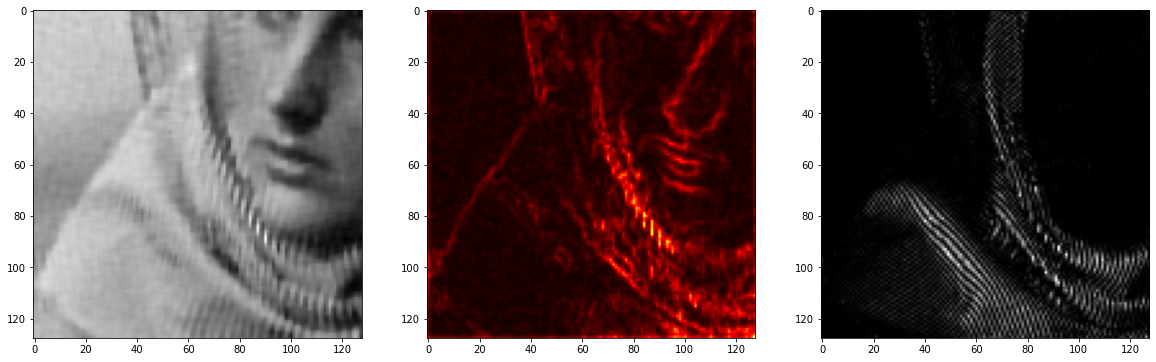

In [86]:
u_langevin = np.load('results/image_ex/deconv/grad_subgrad/barbara/reg_par_15_data_par_399.99999999999994_tau_1e-05_iter_1100000_mmse.npy').squeeze()
#var_langevin = np.load('results/image_ex/deconv/grad_subgrad/barbara/reg_par_15_data_par_399.99999999999994_tau_3e-06_iter_4000000_variance.npy')
err_langevin = (u_langevin-g)**2

plt.figure(1, figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(u_langevin, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(var_langevin, cmap="hot")
plt.subplot(1,3,3)
plt.imshow(err_langevin, cmap="gray")

In [49]:
err = np.zeros([int((1100000-1000000)//1000),*g.shape])
for num,i in enumerate(range(1000000,1100000,1000)):
    u_langevin = np.load('results/image_ex/grad_subgrad/peppers_bw/reg_par_50_data_par_399.99999999999994_tau_1e-05_iter_'+str(i)+'_mmse.npy').squeeze()
    err[num,...] = ((u_langevin-u_avg)**2)

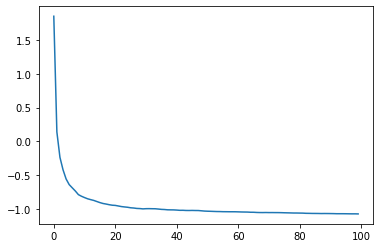

In [50]:
plt.plot(np.log(err.sum(axis=(1,2))))

In [31]:
err.max()

0.03839822966194132

In [84]:
3%2==1

True

In [86]:
u = np.load('images/peppers_bw.npy')